In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from utils.experiments_functions import get_img_info_simple
import utils.noise_generator as noise_gen
import utils.utils as utils_functions

In [7]:
denoise_name = "tv_chambolle_denoising"
images_data = pd.read_csv(f"results/qualificacao_noises/denoising_images/{denoise_name}.csv")
images_data.head()

,Smoothness,Curve structure,Entropy,Complexity,Shannon Entropy,Fisher-Shannon Complexity,image_name,noise_type,noise_param
0,0.215946,0.203333,0.945994,0.069611,0.945994,0.077803,couscous01-r000-s001,original,0.0
1,0.215946,0.203333,0.945994,0.069611,0.945994,0.077803,couscous01-r000-s001,salt_and_pepper,0.0
2,0.215946,0.203333,0.945994,0.069611,0.945994,0.077803,couscous01-r000-s001,speckle,0.0
3,0.215946,0.203333,0.945994,0.069611,0.945994,0.077803,couscous01-r000-s001,gaussian,0.0
4,0.215946,0.203333,0.945994,0.069611,0.945994,0.077803,couscous01-r000-s001,poisson,0.0


In [8]:
# Rename 'noise_param' column to 'param'
images_data = images_data.rename(columns={'noise_param': 'param'})

# Display the first few rows to confirm the change
images_data.head()

,Smoothness,Curve structure,Entropy,Complexity,Shannon Entropy,Fisher-Shannon Complexity,image_name,noise_type,param
0,0.215946,0.203333,0.945994,0.069611,0.945994,0.077803,couscous01-r000-s001,original,0.0
1,0.215946,0.203333,0.945994,0.069611,0.945994,0.077803,couscous01-r000-s001,salt_and_pepper,0.0
2,0.215946,0.203333,0.945994,0.069611,0.945994,0.077803,couscous01-r000-s001,speckle,0.0
3,0.215946,0.203333,0.945994,0.069611,0.945994,0.077803,couscous01-r000-s001,gaussian,0.0
4,0.215946,0.203333,0.945994,0.069611,0.945994,0.077803,couscous01-r000-s001,poisson,0.0


In [9]:
# For each noise type, print the unique parameter values
noise_types = ['salt_and_pepper', 'speckle', 'gaussian', 'poisson']

print("Parameter values by noise type:")
for noise_type in noise_types:
    # Extract data for this noise type
    noise_data = images_data[images_data['noise_type'] == noise_type]
    # Get unique parameter values, sorted
    unique_params = sorted(noise_data['param'].unique())
    
    print(f"\n{noise_type.replace('_', ' ').title()}:")
    print(unique_params)
    print(f"Number of unique values: {len(unique_params)}")
    
    # Additional statistics
    print(f"Min: {min(unique_params)}, Max: {max(unique_params)}")
    
    # For specific noise types, show parameter ranges that might be of interest
    if noise_type == 'gaussian' or noise_type == 'speckle':
        small_range = [p for p in unique_params if p <= 0.2]
        print(f"Values ≤ 0.2: {small_range}")
    elif noise_type == 'poisson':
        small_range = [p for p in unique_params if p <= 1.0]
        large_range = [p for p in unique_params if p >= 10.0]
        print(f"Values ≤ 1.0: {small_range}")
        print(f"Values ≥ 10.0: {large_range}")

Parameter values by noise type:

Salt And Pepper:
[0.0, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
Number of unique values: 7
Min: 0.0, Max: 0.5

Speckle:
[0.0, 0.05, 0.3, 0.6, 0.9, 1.2, 1.5]
Number of unique values: 7
Min: 0.0, Max: 1.5
Values ≤ 0.2: [0.0, 0.05]

Gaussian:
[0.0, 0.05, 0.25, 0.45, 0.65, 0.85, 1.0]
Number of unique values: 7
Min: 0.0, Max: 1.0
Values ≤ 0.2: [0.0, 0.05]

Poisson:
[0.0, 0.05, 1.0, 3.0, 6.0, 15.0, 50.0]
Number of unique values: 7
Min: 0.0, Max: 50.0
Values ≤ 1.0: [0.0, 0.05, 1.0]
Values ≥ 10.0: [15.0, 50.0]


In [10]:
images_names = images_data['image_name'].unique()
print(images_names)

['couscous01-r000-s001' 'towel01-r000-s001' 'sprinkles01-r000-s001'
 'lentils01-r000-s001' 'astronaut' 'cat' 'coins']


### Plot the images noise curves

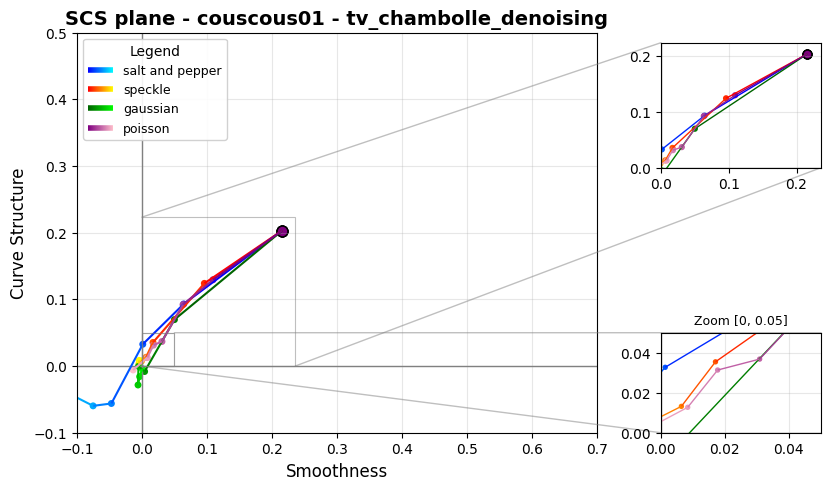

c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:61: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_cont = pd.read_csv(folder_path +'continua-N'+str(N)+'.q1', skiprows=20, sep = '  ')
c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:64: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_troz = pd.read_csv(folder_path +'trozos-N'+str(N)+'.q1', skiprows=20, sep = '  ')


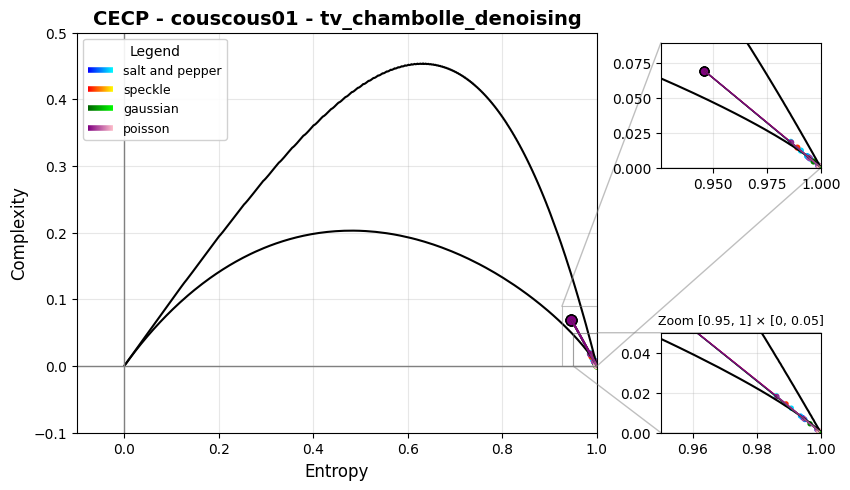

Plots created for couscous01-r000-s001


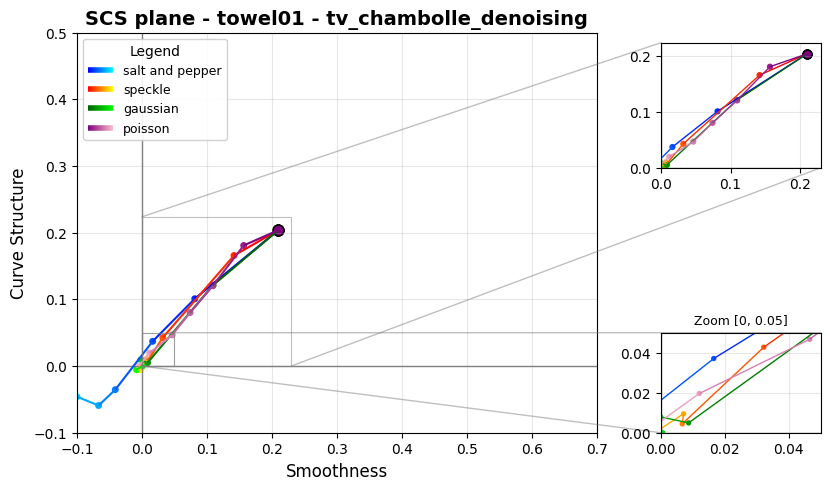

c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:61: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_cont = pd.read_csv(folder_path +'continua-N'+str(N)+'.q1', skiprows=20, sep = '  ')
c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:64: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_troz = pd.read_csv(folder_path +'trozos-N'+str(N)+'.q1', skiprows=20, sep = '  ')


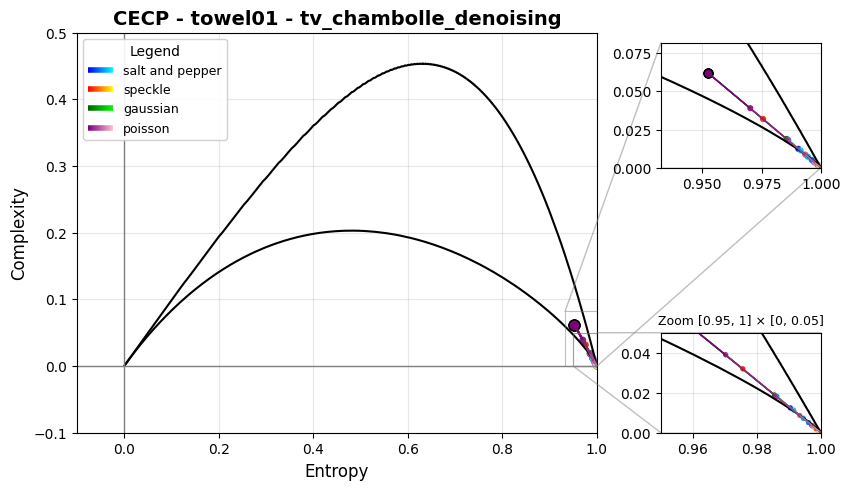

Plots created for towel01-r000-s001


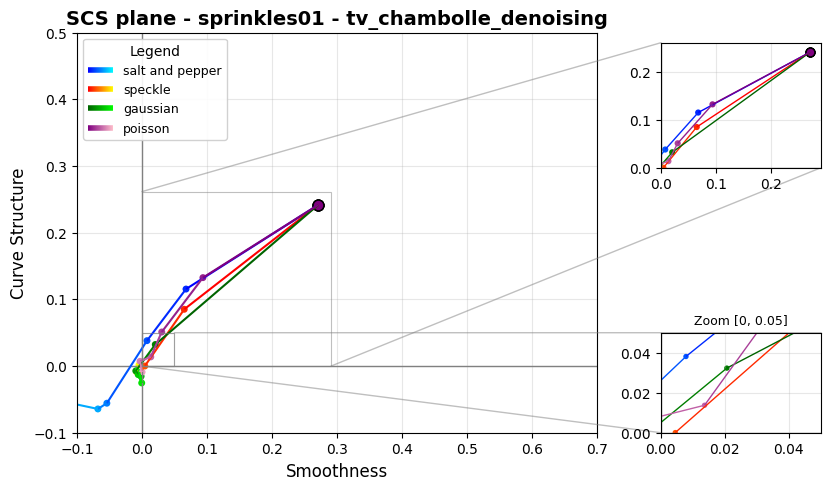

c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:61: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_cont = pd.read_csv(folder_path +'continua-N'+str(N)+'.q1', skiprows=20, sep = '  ')
c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:64: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_troz = pd.read_csv(folder_path +'trozos-N'+str(N)+'.q1', skiprows=20, sep = '  ')


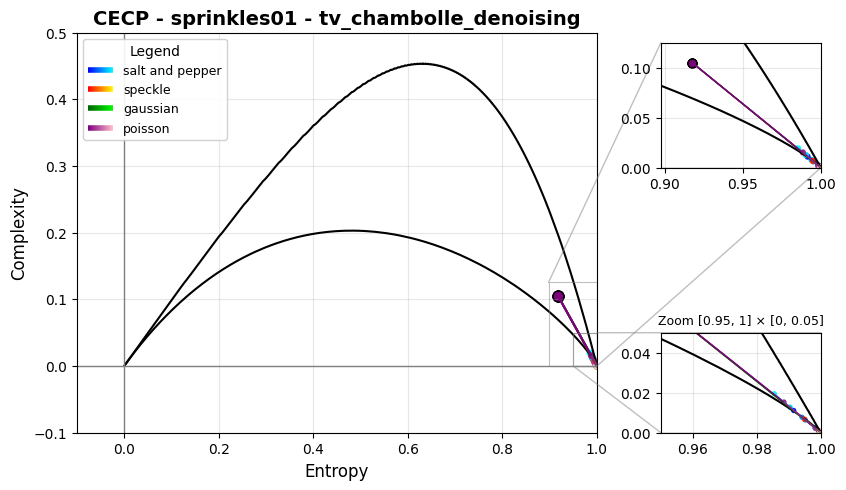

Plots created for sprinkles01-r000-s001


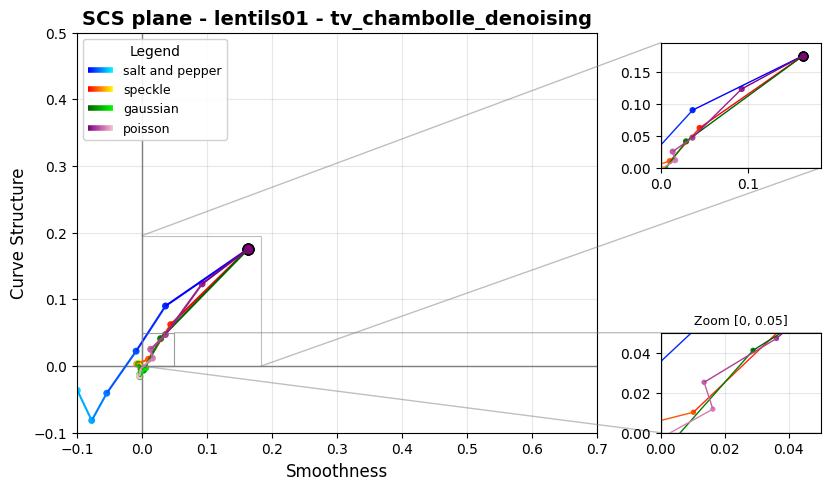

c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:61: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_cont = pd.read_csv(folder_path +'continua-N'+str(N)+'.q1', skiprows=20, sep = '  ')
c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:64: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_troz = pd.read_csv(folder_path +'trozos-N'+str(N)+'.q1', skiprows=20, sep = '  ')


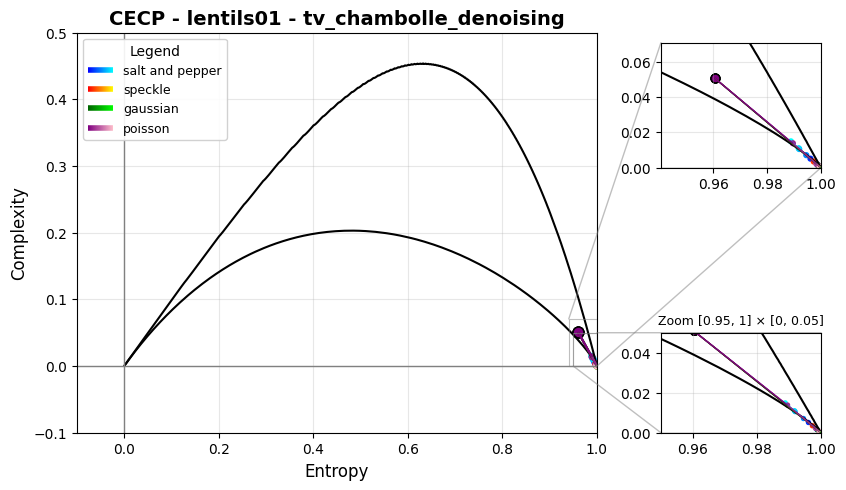

Plots created for lentils01-r000-s001


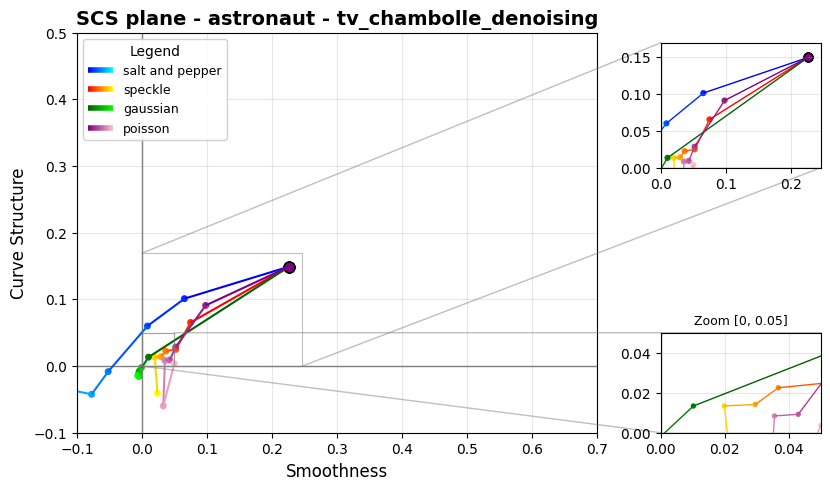

c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:61: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_cont = pd.read_csv(folder_path +'continua-N'+str(N)+'.q1', skiprows=20, sep = '  ')
c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:64: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_troz = pd.read_csv(folder_path +'trozos-N'+str(N)+'.q1', skiprows=20, sep = '  ')


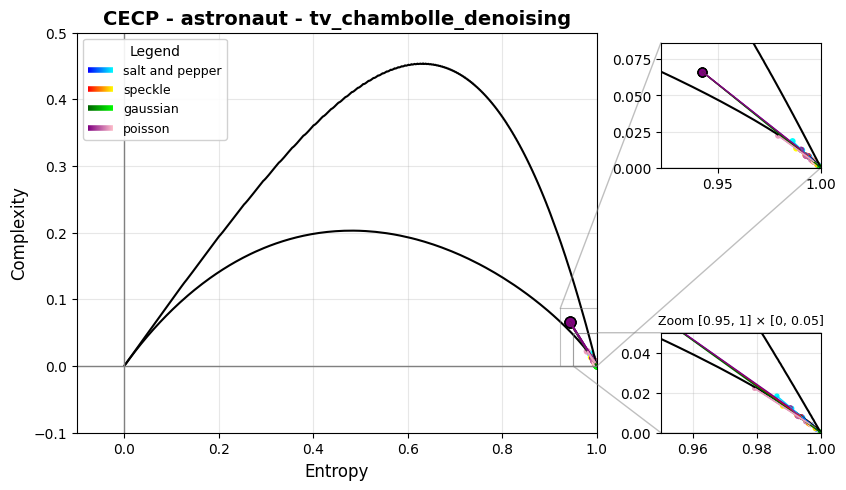

Plots created for astronaut


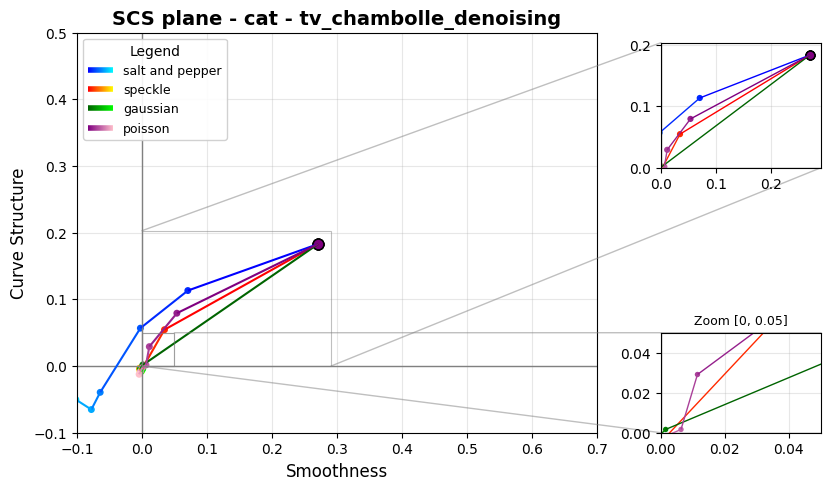

c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:61: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_cont = pd.read_csv(folder_path +'continua-N'+str(N)+'.q1', skiprows=20, sep = '  ')
c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:64: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_troz = pd.read_csv(folder_path +'trozos-N'+str(N)+'.q1', skiprows=20, sep = '  ')


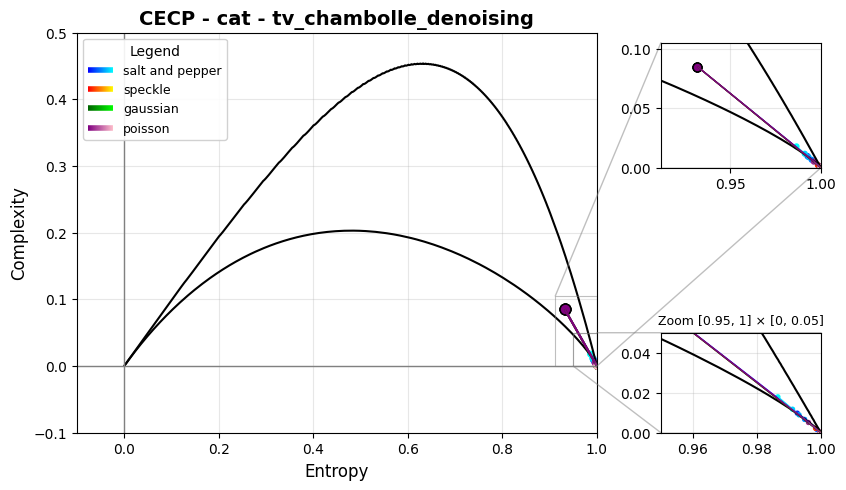

Plots created for cat


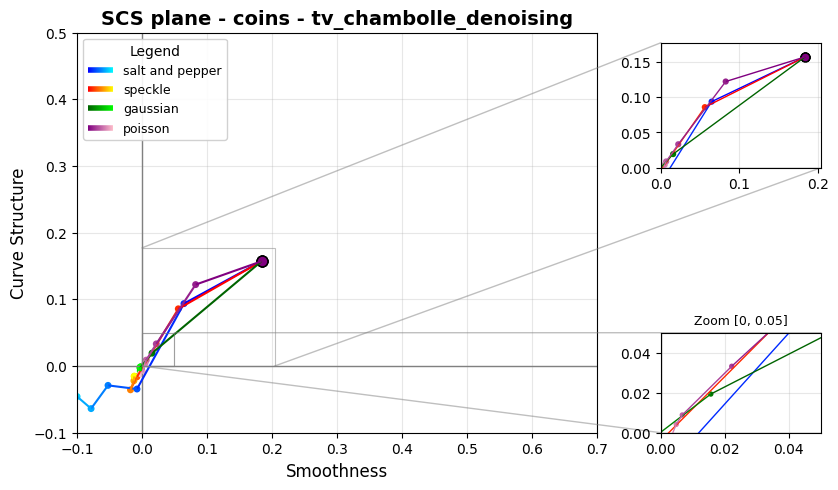

c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:61: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_cont = pd.read_csv(folder_path +'continua-N'+str(N)+'.q1', skiprows=20, sep = '  ')
c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:64: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_troz = pd.read_csv(folder_path +'trozos-N'+str(N)+'.q1', skiprows=20, sep = '  ')


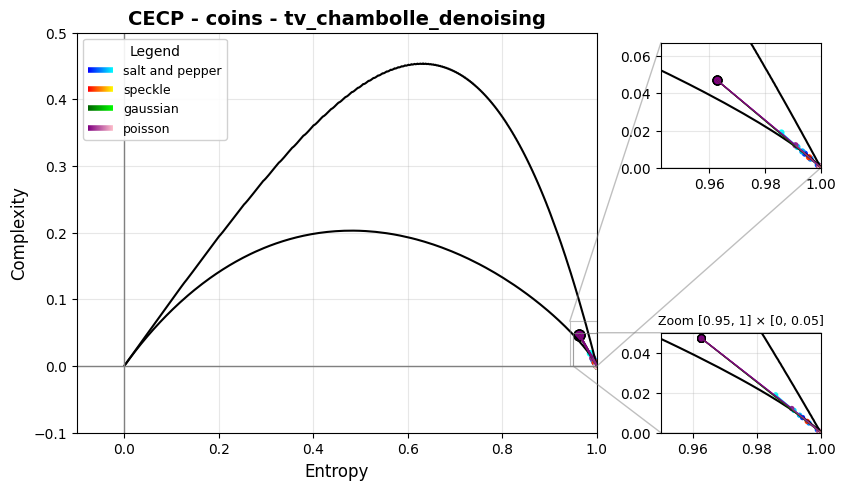

Plots created for coins


In [11]:
from matplotlib.collections import LineCollection
import matplotlib.colors as mcolors
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerBase
from utils.utils import read_entropy_complexity_limits

# Define a custom handler for LineCollection objects in the legend
class HandlerLineCollection(HandlerBase):
    def create_artists(self, legend, orig_handle, xdescent, ydescent, width, height, fontsize, trans):
        x = np.linspace(0, width, 100)
        y = np.zeros_like(x) + height/2
        points = np.array([x, y]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        
        # Create a new LineCollection with the same properties
        lc = LineCollection(segments, cmap=orig_handle.cmap,
                           norm=orig_handle.norm,
                           linewidth=orig_handle.get_linewidth())
        
        # Use a consistent array range for all legends
        lc.set_array(np.linspace(0, 1, 100))
        
        return [lc]

# Define start and end colors for each noise type
noise_color_ranges = {
    'salt_and_pepper': ('blue', 'cyan'),
    'speckle': ('red', 'yellow'),
    'gaussian': ('darkgreen', 'lime'),
    'poisson': ('purple', 'pink')
}

# Process all images
noise_types = ['salt_and_pepper', 'speckle', 'gaussian', 'poisson']

# All images names
images_names = images_data['image_name'].unique()

# Dictionary to change name for display

name_changes = {
    'constant-0.5': 'constant',
    'colored-noise-k6': 'colored noise',
    'fractal-surface-h0.5-delta0.5': 'fractal surface',
    'couscous01-r000-s001': 'couscous01',
    'towel01-r000-s001': 'towel01',
    'sprinkles01-r000-s001': 'sprinkles01',
    'lentils01-r000-s001': 'lentils01',
    'astronaut': 'astronaut',
    'cat': 'cat',
    'coins': 'coins'
}
    

for image_name in images_names:
    image_name = image_name.split('.')[1] if image_name.split('.')[0] == 'data' else image_name
    # Clean up image name for display (remove file extension if present)
    display_name = name_changes[image_name] if image_name in name_changes else image_name
    
    # Filter data for this image
    df = images_data[images_data['image_name'] == image_name].copy()
    
    # First plot - SCSP (Smoothness vs Curve Structure)
    fig1 = plt.figure(figsize=(8, 5))  # Wider figure to accommodate external inset
    
    # Main plot in a central area
    ax_main = fig1.add_axes([0.12, 0.12, 0.65, 0.8])
    
    # Create data-range inset inside the main plot
    axins = plt.axes([0.85, 0.65, 0.2, 0.25], facecolor=ax_main.get_facecolor())
    
    # Create second inset outside and to the right of the main plot
    axins2 = fig1.add_axes([0.85, 0.12, 0.2, 0.2], facecolor=ax_main.get_facecolor())
    
    # Title and axis labels with image name
    ax_main.set_title(f'SCS plane - {display_name} - {denoise_name}', fontsize=14, fontweight='bold')
    ax_main.set_xlabel('Smoothness', fontsize=12)
    ax_main.set_ylabel('Curve Structure', fontsize=12)
    
    # Set up axes for main plot and data-based inset
    for ax in [ax_main, axins]:
        ax.set_xlim([-0.1, 0.7])
        ax.set_ylim([-0.1, 0.5]) 
        ax.grid(True, alpha=0.3)
        ax.axhline(y=0, lw=1, color='gray')
        ax.axvline(x=0, lw=1, color='gray')
    
    # Set up second inset for fixed [0, 0.05] range (SCS)
    axins2.set_xlim([0, 0.05])
    axins2.set_ylim([0, 0.05])
    axins2.grid(True, alpha=0.3)
    axins2.axhline(y=0, lw=1, color='gray')
    axins2.axvline(x=0, lw=1, color='gray')
    # Remove axis labels but keep ticks
    axins2.set_title("Zoom [0, 0.05]", fontsize=9)
    
    # Create plots for each noise type
    legend_handles = []
    legend_labels = []
    
    # Determine zoom region based on data
    all_x = []
    all_y = []
    
    for noise_type in noise_types:
        noise_data = df[df['noise_type'] == noise_type]
        if len(noise_data) == 0:
            continue
            
        # Sort by param value to ensure gradient goes in correct order
        noise_data = noise_data.sort_values('param')
        
        # Define start and end colors for this noise type
        start_color, end_color = noise_color_ranges[noise_type]
        
        # Create custom colormap for this noise type
        cmap = mcolors.LinearSegmentedColormap.from_list(
            f"{noise_type}_cmap", [start_color, end_color]
        )
        
        # Get unique parameter values
        unique_params = noise_data['param'].unique()
        num_params = len(unique_params)
        
        # Create normalized values based on the index of unique parameters
        # This creates an evenly spaced sequence regardless of actual param values
        param_indices = {param: idx/(num_params-1) if num_params > 1 else 0 
                        for idx, param in enumerate(sorted(unique_params))}
        
        # Map each parameter to its normalized index value
        norm_param_values = np.array([param_indices[p] for p in noise_data['param']])
        
        # Create a normalized colormap from 0 to 1 for any number of params
        norm = plt.Normalize(0, 1)
        
        # SCSP plot - Create gradient line collection with thinner lines
        x_vals = noise_data['Smoothness'].values
        y_vals = noise_data['Curve structure'].values
        all_x.extend(x_vals)
        all_y.extend(y_vals)
        
        points = np.array([x_vals, y_vals]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        
        # Main plot with thinner lines
        lc = LineCollection(segments, cmap=cmap, norm=norm, linestyle='-', linewidth=1.5)
        lc.set_array(norm_param_values)
        ax_main.add_collection(lc)
        
        # Inset plot with thinner lines
        lc_ins = LineCollection(segments, cmap=cmap, norm=norm, linestyle='-', linewidth=1)
        lc_ins.set_array(norm_param_values)
        axins.add_collection(lc_ins)
        
        # Second inset (fixed [0, 0.05] range)
        lc_ins2 = LineCollection(segments, cmap=cmap, norm=norm, linestyle='-', linewidth=1)
        lc_ins2.set_array(norm_param_values)
        axins2.add_collection(lc_ins2)
        
        # Scatter points with color gradient
        colors = cmap(norm(norm_param_values))
        ax_main.scatter(x_vals, y_vals, c=colors, edgecolors='none', marker='o', s=25)
        axins.scatter(x_vals, y_vals, c=colors, edgecolors='none', marker='o', s=20)
        axins2.scatter(x_vals, y_vals, c=colors, edgecolors='none', marker='o', s=15)
        
        # Highlight original (no noise) data point if present
        no_noise_data = noise_data[noise_data['param'] == unique_params[0]] # use first param as original
        if len(no_noise_data) > 0:
            ax_main.scatter(no_noise_data['Smoothness'], no_noise_data['Curve structure'],
                           c=start_color, edgecolors='black', marker='o', s=60)
            axins.scatter(no_noise_data['Smoothness'], no_noise_data['Curve structure'],
                         c=start_color, edgecolors='black', marker='o', s=40)
            axins2.scatter(no_noise_data['Smoothness'], no_noise_data['Curve structure'],
                          c=start_color, edgecolors='black', marker='o', s=30)
        
        # Create a gradient line specifically for the legend
        gradient_x = np.linspace(0, 1, 100)
        gradient_y = np.ones_like(gradient_x) * 0.5
        gradient_points = np.array([gradient_x, gradient_y]).T.reshape(-1, 1, 2)
        gradient_segments = np.concatenate([gradient_points[:-1], gradient_points[1:]], axis=1)
        
        # Create a LineCollection for the legend with explicit gradient
        legend_lc = LineCollection(gradient_segments, linewidth=4)
        legend_lc.set_cmap(cmap)
        legend_lc.set_norm(norm)
        
        # Set array to a simple 0-1 range for consistent gradient display
        legend_lc.set_array(np.linspace(0, 1, 100))
        
        # Store cmap and norm as attributes for the handler to access    
        legend_lc.cmap = cmap
        legend_lc.norm = norm
        
        # Add to legend with the gradient LineCollection
        legend_handles.append(legend_lc)
        legend_labels.append(f"{noise_type.replace('_', ' ')}")
    
    # Configure first inset zoom area (data-based)
    if all_x and all_y:
        # Dynamic zoom based on data range
        x_min, x_max = min(all_x), max(all_x)
        y_min, y_max = min(all_y), max(all_y)
        
        # Add padding
        padding = 0.02
        
        axins.set_xlim(max(0, x_min - padding), min(1.0, x_max + padding))
        axins.set_ylim(max(0, y_min - padding), min(1.0, y_max + padding))
        
        # Mark the zoom area with a lighter, thinner connection
        ax_main.indicate_inset_zoom(axins, edgecolor='gray', alpha=0.5, linewidth=0.8)
    
    # Add indicate_inset_zoom for the second inset (fixed range)
    # Create a rectangle patch in the main plot showing the zoom region
    rect = plt.Rectangle((0, 0), 0.05, 0.05, 
                        fill=False, edgecolor='gray', linestyle='-', alpha=0.5, linewidth=0.8)
    ax_main.add_patch(rect)
    
    # Use indicate_inset_zoom to connect the rectangle to the external inset
    ax_main.indicate_inset_zoom(axins2, edgecolor='gray', alpha=0.5, linewidth=0.8)
    
    # Add legend to main plot with custom handler for LineCollection objects
    ax_main.legend(legend_handles, legend_labels, loc='upper left', 
                  fontsize=9, framealpha=0.9, title='Legend', title_fontsize=10,
                  handler_map={LineCollection: HandlerLineCollection()})
    
    plt.savefig(f'results/qualificacao_noises/denoising_images/{denoise_name}_{image_name}_scs_comparison.png', bbox_inches='tight', dpi=300)
    plt.show()
    plt.close(fig1)
    
    # Second plot - CECP (Entropy vs Complexity)    
    
    fig2 = plt.figure(figsize=(8, 5))  # Wider figure to accommodate external inset
    
    # Main plot in a central area
    ax_main = fig2.add_axes([0.12, 0.12, 0.65, 0.8])
    
    # Create data-range inset inside the main plot
    axins = plt.axes([0.85, 0.65, 0.2, 0.25], facecolor=ax_main.get_facecolor())
    
    # Create second inset outside and to the right of the main plot
    axins2 = fig2.add_axes([0.85, 0.12, 0.2, 0.2], facecolor=ax_main.get_facecolor())
    
    # reads CECP superior and inferior limits
    df_cont, df_troz = read_entropy_complexity_limits('data/limits/mv/', N=240)
    # Plot the continuous and troz limits
    ax_main.plot(df_cont['HT'], df_cont['CJT'], color='black')
    ax_main.plot(df_troz['HT'], df_troz['CJT'], color='black')
    axins.plot(df_cont['HT'], df_cont['CJT'], color='black')
    axins.plot(df_troz['HT'], df_troz['CJT'], color='black')
    axins2.plot(df_cont['HT'], df_cont['CJT'], color='black')
    axins2.plot(df_troz['HT'], df_troz['CJT'], color='black')
    
    # Title and axis labels with image name
    ax_main.set_title(f'CECP - {display_name} - {denoise_name}', fontsize=14, fontweight='bold')
    ax_main.set_xlabel('Entropy', fontsize=12)
    ax_main.set_ylabel('Complexity', fontsize=12)
    
    # Set up axes for main plot and data-based inset
    for ax in [ax_main, axins]:
        ax.set_xlim([-0.1, 1])
        ax.set_ylim([-0.1, 0.5])
        ax.grid(True, alpha=0.3)
        ax.axhline(y=0, lw=1, color='gray')
        ax.axvline(x=0, lw=1, color='gray')
    
    # Set up second inset for CECP with specified ranges [0.95, 1] x [0, 0.05]
    axins2.set_xlim([0.95, 1])
    axins2.set_ylim([0, 0.05])
    axins2.grid(True, alpha=0.3)
    axins2.axhline(y=0, lw=1, color='gray')
    # No need for vertical line at x=0 since it's out of the range
    if 0.95 <= 0 <= 1:
        axins2.axvline(x=0, lw=1, color='gray')
    # Remove axis labels but keep ticks
    axins2.set_title("Zoom [0.95, 1] × [0, 0.05]", fontsize=9)
    
    # Create plots for each noise type
    legend_handles = []
    legend_labels = []
    
    # Determine zoom region based on data
    all_x = []
    all_y = []
    
    for noise_type in noise_types:
        noise_data = df[df['noise_type'] == noise_type]
        if len(noise_data) == 0:
            continue
            
        # Sort by param value to ensure gradient goes in correct order
        noise_data = noise_data.sort_values('param')
        
        # Define start and end colors for this noise type
        start_color, end_color = noise_color_ranges[noise_type]
        
        # Create custom colormap for this noise type
        cmap = mcolors.LinearSegmentedColormap.from_list(
            f"{noise_type}_cmap", [start_color, end_color]
        )
        
        # Get unique parameter values
        unique_params = noise_data['param'].unique()
        num_params = len(unique_params)
        
        # Create normalized values based on the index of unique parameters
        # This creates an evenly spaced sequence regardless of actual param values
        param_indices = {param: idx/(num_params-1) if num_params > 1 else 0 
                        for idx, param in enumerate(sorted(unique_params))}
        
        # Map each parameter to its normalized index value
        norm_param_values = np.array([param_indices[p] for p in noise_data['param']])
        
        # Create a normalized colormap from 0 to 1 for any number of params
        norm = plt.Normalize(0, 1)
        
        # CECP plot - Create gradient line collection with thinner lines
        x_vals = noise_data['Entropy'].values
        y_vals = noise_data['Complexity'].values
        all_x.extend(x_vals)
        all_y.extend(y_vals)
        
        points = np.array([x_vals, y_vals]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        
        # Main plot with thinner lines
        lc = LineCollection(segments, cmap=cmap, norm=norm, linestyle='-', linewidth=1.5)
        lc.set_array(norm_param_values)
        ax_main.add_collection(lc)
        
        # Inset plot with thinner lines
        lc_ins = LineCollection(segments, cmap=cmap, norm=norm, linestyle='-', linewidth=1)
        lc_ins.set_array(norm_param_values)
        axins.add_collection(lc_ins)
        
        # Second inset with specified ranges
        lc_ins2 = LineCollection(segments, cmap=cmap, norm=norm, linestyle='-', linewidth=1)
        lc_ins2.set_array(norm_param_values)
        axins2.add_collection(lc_ins2)
        
        # Scatter points with color gradient
        colors = cmap(norm(norm_param_values))
        ax_main.scatter(x_vals, y_vals, c=colors, edgecolors='none', marker='o', s=25)
        axins.scatter(x_vals, y_vals, c=colors, edgecolors='none', marker='o', s=20)
        axins2.scatter(x_vals, y_vals, c=colors, edgecolors='none', marker='o', s=15)
        
        # Highlight original (no noise) data point if present
        no_noise_data = noise_data[noise_data['param'] == unique_params[0]] # use first param as original
        if len(no_noise_data) > 0:
            ax_main.scatter(no_noise_data['Entropy'], no_noise_data['Complexity'],
                           c=start_color, edgecolors='black', marker='o', s=60)
            axins.scatter(no_noise_data['Entropy'], no_noise_data['Complexity'],
                         c=start_color, edgecolors='black', marker='o', s=40)
            axins2.scatter(no_noise_data['Entropy'], no_noise_data['Complexity'],
                          c=start_color, edgecolors='black', marker='o', s=30)
        
        # Create a gradient line specifically for the legend
        gradient_x = np.linspace(0, 1, 100)
        gradient_y = np.ones_like(gradient_x) * 0.5
        gradient_points = np.array([gradient_x, gradient_y]).T.reshape(-1, 1, 2)
        gradient_segments = np.concatenate([gradient_points[:-1], gradient_points[1:]], axis=1)
        
        # Create a LineCollection for the legend with explicit gradient
        legend_lc = LineCollection(gradient_segments, linewidth=4)
        legend_lc.set_cmap(cmap)
        legend_lc.set_norm(norm)
        
        # Set array to a simple 0-1 range for consistent gradient display
        legend_lc.set_array(np.linspace(0, 1, 100))
        
        # Store cmap and norm as attributes for the handler to access    
        legend_lc.cmap = cmap
        legend_lc.norm = norm
        
        # Add to legend with the gradient LineCollection
        legend_handles.append(legend_lc)
        legend_labels.append(f"{noise_type.replace('_', ' ')}")
    
    # Configure first inset zoom area (data-based)
    if all_x and all_y:
        # Dynamic zoom based on data range
        x_min, x_max = min(all_x), max(all_x)
        y_min, y_max = min(all_y), max(all_y)
        
        # Add padding
        padding = 0.02
        
        axins.set_xlim(max(0, x_min - padding), min(1.0, x_max + padding))
        axins.set_ylim(max(0, y_min - padding), min(1.0, y_max + padding))
        
        # Mark the zoom area with a lighter connection
        ax_main.indicate_inset_zoom(axins, edgecolor='gray', alpha=0.5, linewidth=0.8)
    
    # Add indicate_inset_zoom for the second inset (fixed range)
    # Create a rectangle patch in the main plot showing the zoom region
    rect = plt.Rectangle((0.95, 0), 0.05, 0.05, 
                        fill=False, edgecolor='gray', linestyle='-', alpha=0.5, linewidth=0.8)
    ax_main.add_patch(rect)
    
    # Use indicate_inset_zoom to connect the rectangle to the external inset
    ax_main.indicate_inset_zoom(axins2, edgecolor='gray', alpha=0.5, linewidth=0.8)
    
    # Add legend to main plot with custom handler for LineCollection objects
    ax_main.legend(legend_handles, legend_labels, loc='upper left', 
                  fontsize=9, framealpha=0.9, title='Legend', title_fontsize=10,
                  handler_map={LineCollection: HandlerLineCollection()})

    plt.savefig(f'results/qualificacao_noises/denoising_images/{denoise_name}_{image_name}_cecp_comparison.png', bbox_inches='tight', dpi=300)
    plt.show()
    plt.close(fig2)
    
    print(f"Plots created for {image_name}")

### Plot only original images dots